# TASK 2A: APPLICATION OF CLASSIFICATION ALGORITHMS

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif , chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score, f1_score,confusion_matrix #, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')


In [21]:
data = pd.read_csv('classification_dataset_new.csv')
data

,Unnamed: 0,programme,age,students_in_room,stress_level,sports_per_week,bed_time,good_day_(1)_0,good_day_(1)_1,good_day_(1)_2,...,good_day_(1)_4,good_day_(1)_5,good_day_(1)_6,good_day_(2)_0,good_day_(2)_1,good_day_(2)_2,good_day_(2)_3,good_day_(2)_4,good_day_(2)_5,good_day_(2)_6
0,0,AI,0.142857,0.079402,0.5,0.018868,0.187630,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,AI,0.238095,0.331415,1.0,0.000000,0.979847,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2,AI,0.238095,0.654776,0.6,0.037736,0.958999,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,3,AI,0.238095,0.217491,0.2,0.094340,0.979847,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,Data Mining,0.285714,0.079402,0.5,0.094340,0.958999,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,300,CS,0.095238,0.194476,0.7,0.188679,0.041696,0,0,0,...,0,1,0,0,0,0,0,1,0,0
301,301,Exch,0.285714,0.424626,0.7,0.000000,0.047950,1,0,0,...,0,0,0,1,0,0,0,0,0,0
302,302,CS,0.285714,0.136939,0.1,0.094340,0.166782,0,0,0,...,0,0,0,1,0,0,0,0,0,0
303,303,AI,0.285714,0.136939,0.1,0.094340,0.166782,0,0,0,...,0,0,1,0,0,0,0,0,0,1


Best hyperparameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 25, 'knn__p': 2, 'knn__weights': 'uniform', 'select__k': 4}
Accuracy score: 0.4346088435374149

Selected Features:
stress_level: 0.13050122568179384
bed_time: 0.912234953819407
good_day_(1)_1: 0.5633699631276252
good_day_(2)_2: 0.0746294658625481
Test set accuracy: 0.4262295081967213
Test set F1 score: 0.11684981684981685

Confusion Matrix:
[[ 0  0  0  1  0  0  0  0]
 [ 0  8  0  8  0  0  0  0]
 [ 0  2  0  3  0  0  0  0]
 [ 0 12  0 18  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]]


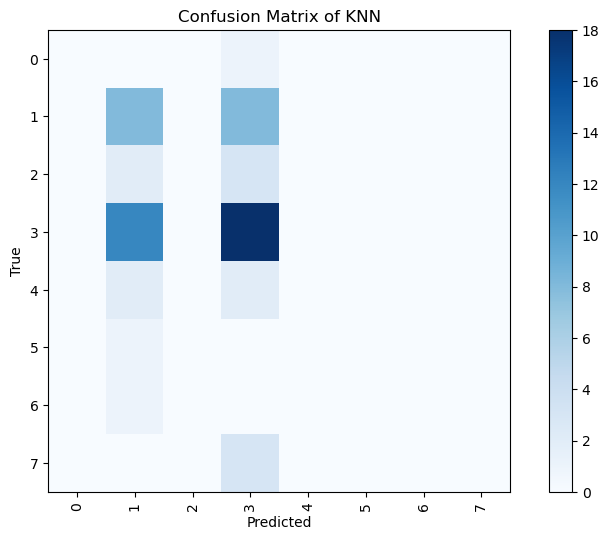

In [19]:
"""
Required Data Preparation:
1. Data Scaling: To locate the data point in multidimensional feature space, it would be helpful if all features are on the same scale. Hence normalization or standardization of data will help.

2. Dimensionality Reduction: KNN may not work well if there are too many features. Hence dimensionality reduction techniques like feature selection, principal component analysis can be implemented.

3. Missing value treatment: If out of M features one feature data is missing for a particular example in the training set then we cannot locate or calculate distance from that point. Therefore deleting that row or imputation is required.
"""



# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest, f_classif , chi2
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix #, plot_confusion_matrix
# import matplotlib.pyplot as plt
# from sklearn.metrics import ConfusionMatrixDisplay


# import warnings
# warnings.filterwarnings('ignore')

# Load the dataset
data_1 = pd.read_csv('new_data_fill_missing_linear&mode.csv')
data = pd.read_csv('classification_dataset.csv')


# Check for missing values
# print(data.isnull().sum())

# Drop missing values
data = data.dropna()

# Separate target variable and feature variables
target = data_1['programme']
# data = data.drop(["Tijdstempel",'random_number','good_day_(1)',
#                   'good_day_(2)','birthday','bed_time'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'knn__n_neighbors': range(1, 31),  # number of neighbors to include in the majority of the voting process
    'knn__weights': ['uniform', 'distance'],  # weight function to use in prediction
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # algorithm to use for nearest neighbors search
    'knn__p': [1, 2],  # power parameter for Minkowski metric
    'select__k': [2, 3, 4]  # select the best 2, 3, or 4 features
}

# Create a pipeline to select the best features and train the KNN model
pipeline = Pipeline([
#     ('select', SelectKBest(f_classif)),
    ('select', SelectKBest(f_classif)),
    ('knn', KNeighborsClassifier())
])

# # Get the best estimator from the GridSearchCV object
# best_model = grid_search.best_estimator_

# # Plot the confusion matrix
# # fig, ax = plt.subplots(figsize=(10, 8))
# plot_confusion_matrix(best_model, X_test, y_test, cmap='Blues')
# # ax.set_title('Confusion Matrix')
# plt.show()


# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Print the selected features and their p-values
selected_features = grid_search.best_estimator_.named_steps['select'].get_support()
p_values = grid_search.best_estimator_.named_steps['select'].pvalues_
feature_names = data.columns

print("\nSelected Features:")
for i, feature in enumerate(feature_names[selected_features]):
    print(f"{feature}: {p_values[i]}")

# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)

# # Plot the confusion matrix
# ConfusionMatrixDisplay(grid_search, X_test, y_test, xticks_rotation='vertical')
# plt.title("Confusion Matrix of KNN")

# Compute and print the confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot the confusion matrix with x-axis labels rotated vertically
plt.figure(figsize=(10, 6))
plt.title("Confusion Matrix of KNN")
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks(rotation='vertical') # Rotate x-axis labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()


Best hyperparameters: {'select__k': 4, 'tree__criterion': 'entropy', 'tree__max_depth': 4, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 9, 'tree__splitter': 'random'}
Accuracy score: 0.4306972789115647

Selected Features:
course_ML: 0.00021307021097858312
course_statistics: 0.6124055806753081
course_databases: 0.0027408229370954793
stress_level: 0.002329675257964337
Test set accuracy: 0.4262295081967213
Test set F1 score: 0.3749474569146701

Confusion Matrix:
[[ 0  1  0  0  0  0  0  0]
 [ 0  7  0  9  0  0  0  0]
 [ 0  3  0  2  0  0  0  0]
 [ 0 11  0 19  0  0  0  0]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  2  0  0  0  0]]


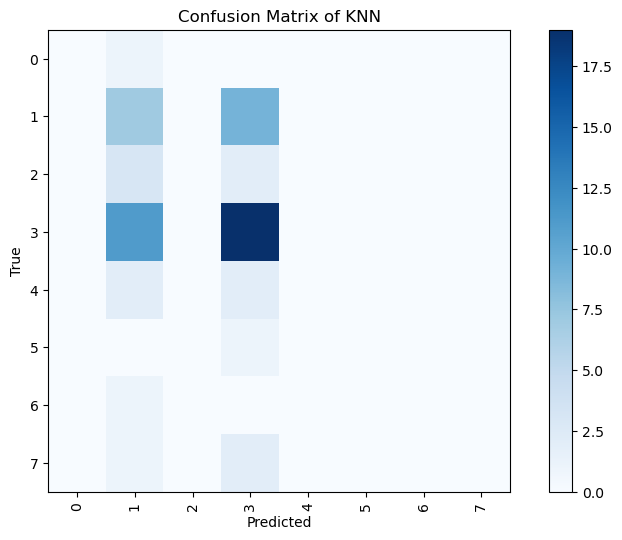

In [20]:
"""
Assumptions while creating Decision Tree
Below are some of the assumptions we make while using Decision tree:

In the beginning, the whole training set is considered as the root.
Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.
Records are distributed recursively on the basis of attribute values.
Order to placing attributes as root or internal node of the tree is done by using some statistical approach.
"""


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif , chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix #, plot_confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
# iris = pd.read_csv('new_data_fill_missing_linear&mode.csv')

data_1 = pd.read_csv('new_data_fill_missing_linear&mode.csv')
data = pd.read_csv('classification_dataset.csv')


# Check for missing values
# print(data.isnull().sum())

# Drop missing values
data = data.dropna()

# Separate target variable and feature variables
target = data_1['programme']


# Check for missing values
# print(iris.isnull().sum())

# Drop missing values
iris = iris.dropna()

# Separate target variable and feature variables
# target = iris['programme']
# iris = iris.drop(['programme',"Tijdstempel",'random_number','good_day_(1)',
#                   'good_day_(2)','birthday','bed_time'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__splitter': ['best', 'random'],
    'tree__max_depth': range(1, 10),
    'tree__min_samples_split': range(2, 10),
    'tree__min_samples_leaf': range(1, 5),
    'select__k': [2, 3, 4]  # select the best 2, 3, or 4 features
}

# Create a pipeline to select the best features and train the Decision Tree model
pipeline = Pipeline([
    ('select', SelectKBest(f_classif)),
#     ('select', SelectKBest(score_func=chi2, k=5)),
    ('tree', DecisionTreeClassifier())
])

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Print the selected features and their p-values
selected_features = grid_search.best_estimator_.named_steps['select'].get_support()
p_values = grid_search.best_estimator_.named_steps['select'].pvalues_
feature_names = iris.columns

print("\nSelected Features:")
for i, feature in enumerate(feature_names[selected_features]):
    print(f"{feature}: {p_values[i]}")


# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') # calculate the weighted F1 score
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)

# # # Plot the confusion matrix
# # plot_confusion_matrix(grid_search, X_test, y_test, xticks_rotation='vertical')
# # plt.title("Confusion Matrix of Decision Tree")

# # Compute and print the confusion matrix as text
# cm = confusion_matrix(y_test, y_pred)
# print("\nConfusion Matrix:")
# print(cm)

# Compute and print the confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot the confusion matrix with x-axis labels rotated vertically
plt.figure(figsize=(10, 6))
plt.title("Confusion Matrix of KNN")
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks(rotation='vertical') # Rotate x-axis labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('new_data_fill_missing_linear&mode.csv')

# Check for missing values
# print(data.isnull().sum())

# Drop missing values
data = data.dropna()

# Separate target variable and feature variables
target = data['programme']
data = data.drop(['programme', "Tijdstempel", 'random_number', 'good_day_(1)',
                  'good_day_(2)', 'birthday', 'bed_time'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # type of regularization penalty
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],  # inverse of regularization strength
    'select__k': [2, 3, 4]  # select the best 2, 3, or 4 features
}

# Create a pipeline to select the best features and train the Logistic Regression model
pipeline = Pipeline([
    ('select', SelectKBest(score_func=chi2, k=5)),
    ('logreg', LogisticRegression())
])

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Print the selected features and their p-values
selected_features = grid_search.best_estimator_.named_steps['select'].get_support()
p_values = grid_search.best_estimator_.named_steps['select'].pvalues_
feature_names = data.columns

print("\nSelected Features:")
for i, feature in enumerate(feature_names[selected_features]):
    print(f"{feature}: {p_values[i]}")

# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)

# Plot the confusion matrix
plot_confusion_matrix(grid_search, X_test, y_test, xticks_rotation='vertical')
plt.title("Confusion Matrix of Logistic Regression")

# Compute and print the confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


In [23]:
iris = pd.read_csv('classification_dataset_new.csv')
iris

,Unnamed: 0,programme,age,students_in_room,stress_level,sports_per_week,bed_time,good_day_(1)_0,good_day_(1)_1,good_day_(1)_2,...,good_day_(1)_4,good_day_(1)_5,good_day_(1)_6,good_day_(2)_0,good_day_(2)_1,good_day_(2)_2,good_day_(2)_3,good_day_(2)_4,good_day_(2)_5,good_day_(2)_6
0,0,AI,0.142857,0.079402,0.5,0.018868,0.187630,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,AI,0.238095,0.331415,1.0,0.000000,0.979847,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2,AI,0.238095,0.654776,0.6,0.037736,0.958999,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,3,AI,0.238095,0.217491,0.2,0.094340,0.979847,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,Data Mining,0.285714,0.079402,0.5,0.094340,0.958999,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,300,CS,0.095238,0.194476,0.7,0.188679,0.041696,0,0,0,...,0,1,0,0,0,0,0,1,0,0
301,301,Exch,0.285714,0.424626,0.7,0.000000,0.047950,1,0,0,...,0,0,0,1,0,0,0,0,0,0
302,302,CS,0.285714,0.136939,0.1,0.094340,0.166782,0,0,0,...,0,0,0,1,0,0,0,0,0,0
303,303,AI,0.285714,0.136939,0.1,0.094340,0.166782,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [33]:
################################
"""
Assumptions while creating Decision Tree
Below are some of the assumptions we make while using Decision tree:

In the beginning, the whole training set is considered as the root.
Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.
Records are distributed recursively on the basis of attribute values.
Order to placing attributes as root or internal node of the tree is done by using some statistical approach.
"""


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif , chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score ,confusion_matrix #, plot_confusion_matrix
import matplotlib.pyplot as plt


# Load the dataset
iris = pd.read_csv('classification_dataset_new.csv')

# Check for missing values
# print(iris.isnull().sum())


# Separate target variable and feature variables
target = iris['programme']
iris = iris.drop(['programme','Unnamed: 0'], axis=1)
print(iris.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__splitter': ['best', 'random'],
    'tree__max_depth': range(1, 10),
    'tree__min_samples_split': range(2, 10),
    'tree__min_samples_leaf': range(1, 5),
    'select__k': [2, 3, 4]  # select the best 2, 3, or 4 features
}

# Create a pipeline to select the best features and train the Decision Tree model
pipeline = Pipeline([
#     ('select', SelectKBest(f_classif)),
#     ('select', SelectKBest(score_func=chi2, k=5)),
    ('tree', DecisionTreeClassifier())
])



# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator from the GridSearchCV object
best_model = grid_search.best_estimator_

# Plot the decision tree
fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(best_model.named_steps['tree'], 
                   feature_names=data.columns,  
                   class_names=target.unique())
plt.show()

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Print the selected features and their p-values
selected_features = grid_search.best_estimator_.named_steps['select'].get_support()
p_values = grid_search.best_estimator_.named_steps['select'].pvalues_
feature_names = iris.columns

print("\nSelected Features:")
for i, feature in enumerate(feature_names[selected_features]):
    print(f"{feature}: {p_values[i]}")


# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') # calculate the weighted F1 score
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)

# # Plot the confusion matrix
# plot_confusion_matrix(grid_search, X_test, y_test, xticks_rotation='vertical')
# plt.title("Confusion Matrix of Decision Tree")

# Compute and print the confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot the confusion matrix with x-axis labels rotated vertically
plt.figure(figsize=(30, 25))
plt.title("Confusion Matrix of KNN")
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks(rotation='vertical') # Rotate x-axis labels
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()

        age  students_in_room  stress_level  sports_per_week  bed_time  \
0  0.142857          0.079402           0.5         0.018868  0.187630   
1  0.238095          0.331415           1.0         0.000000  0.979847   
2  0.238095          0.654776           0.6         0.037736  0.958999   
3  0.238095          0.217491           0.2         0.094340  0.979847   
4  0.285714          0.079402           0.5         0.094340  0.958999   

   good_day_(1)_0  good_day_(1)_1  good_day_(1)_2  good_day_(1)_3  \
0               1               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               1               0               0   
4               0               1               0               0   

   good_day_(1)_4  good_day_(1)_5  good_day_(1)_6  good_day_(2)_0  \
0               0               0               0               0   
1 

ValueError: Invalid parameter 'select' for estimator Pipeline(steps=[('tree', DecisionTreeClassifier())]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [31]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import datasets
# from sklearn import tree
# import matplotlib.pyplot as plt

# # Load the iris dataset
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# # Train a decision tree classifier
# clf = DecisionTreeClassifier()
# clf.fit(X, y)
# print(iris.feature_names,iris.target_names)
# # # Plot the decision tree
# # fig = plt.figure(figsize=(15,10))
# # _ = tree.plot_tree(clf, 
# #                    feature_names=iris.feature_names,  
# #                    class_names=iris.target_names)
# # plt.show()



In [32]:
# iris = pd.read_csv('new_data_fill_missing_linear&mode.csv')
# print(iris.columns)
# target = iris['programme']

# print(target.unique())


In [33]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree
# import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')

# # Load the dataset
# data = pd.read_csv('new_data_fill_missing_linear&mode.csv')

# # Check for missing values
# # print(data.isnull().sum())

# # Drop missing values
# data = data.dropna()

# # Separate target variable and feature variables
# target = data['programme']
# data = data.drop(['programme', "Tijdstempel", 'random_number', 'good_day_(1)',
#                   'good_day_(2)', 'birthday', 'bed_time'], axis=1)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# # Define the hyperparameters to be tuned
# param_grid = {
#     'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # type of regularization penalty
#     'logreg__C': [0.001, 0.01, 0.1, 1, 10],  # inverse of regularization strength
#     'select__k': [2, 3, 4]  # select the best 2, 3, or 4 features
# }

# # Create a pipeline to select the best features and train the Logistic Regression model
# pipeline = Pipeline([
#     ('select', SelectKBest(score_func=chi2, k=5)),
#     ('logreg', LogisticRegression())
# ])

# # Perform a grid search to find the best hyperparameters
# grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best estimator from the GridSearchCV object
# best_model = grid_search.best_estimator_

# # Plot the decision tree
# fig = plt.figure(figsize=(15,10))
# _ = tree.plot_tree(best_model.named_steps['logreg'], 
#                    feature_names=data.columns,  
#                    class_names=target.unique())
# plt.show()

# # Print the best hyperparameters and their corresponding accuracy score
# print("Best hyperparameters:", grid_search.best_params_)
# print("Accuracy score:", grid_search.best_score_)

# # Print the selected features and their p-values
# selected_features = grid_search.best_estimator_.named_steps['select'].get_support()
# p_values = grid_search.best_estimator_.named_steps['select'].pvalues_
# feature_names = data.columns

# print("\nSelected Features:")
# for i, feature in enumerate(feature_names[selected_features]):
#     print(f"{feature}: {p_values[i]}")

# # Evaluate the performance on the test set using the best hyperparameters
# y_pred = grid_search.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='macro')
# print("Test set accuracy:", accuracy)
# print("Test set F1 score:", f1)

# # Plot the confusion matrix
# plot_confusion_matrix(grid_search, X_test, y_test, xticks_rotation='vertical')
# plt.title("Confusion Matrix of Logistic Regression")

# # Compute and print the confusion matrix as text
# cm = confusion_matrix(y_test, y_pred)
# print("\nConfusion Matrix:")
# print(cm)


        age  students_in_room  stress_level  sports_per_week  bed_time  \
0  0.142857          0.079402           0.5         0.018868  0.187630   
1  0.238095          0.331415           1.0         0.000000  0.979847   
2  0.238095          0.654776           0.6         0.037736  0.958999   
3  0.238095          0.217491           0.2         0.094340  0.979847   
4  0.285714          0.079402           0.5         0.094340  0.958999   

   good_day_(1)_0  good_day_(1)_1  good_day_(1)_2  good_day_(1)_3  \
0               1               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               1               0               0   
4               0               1               0               0   

   good_day_(1)_4  good_day_(1)_5  good_day_(1)_6  good_day_(2)_0  \
0               0               0               0               0   
1 

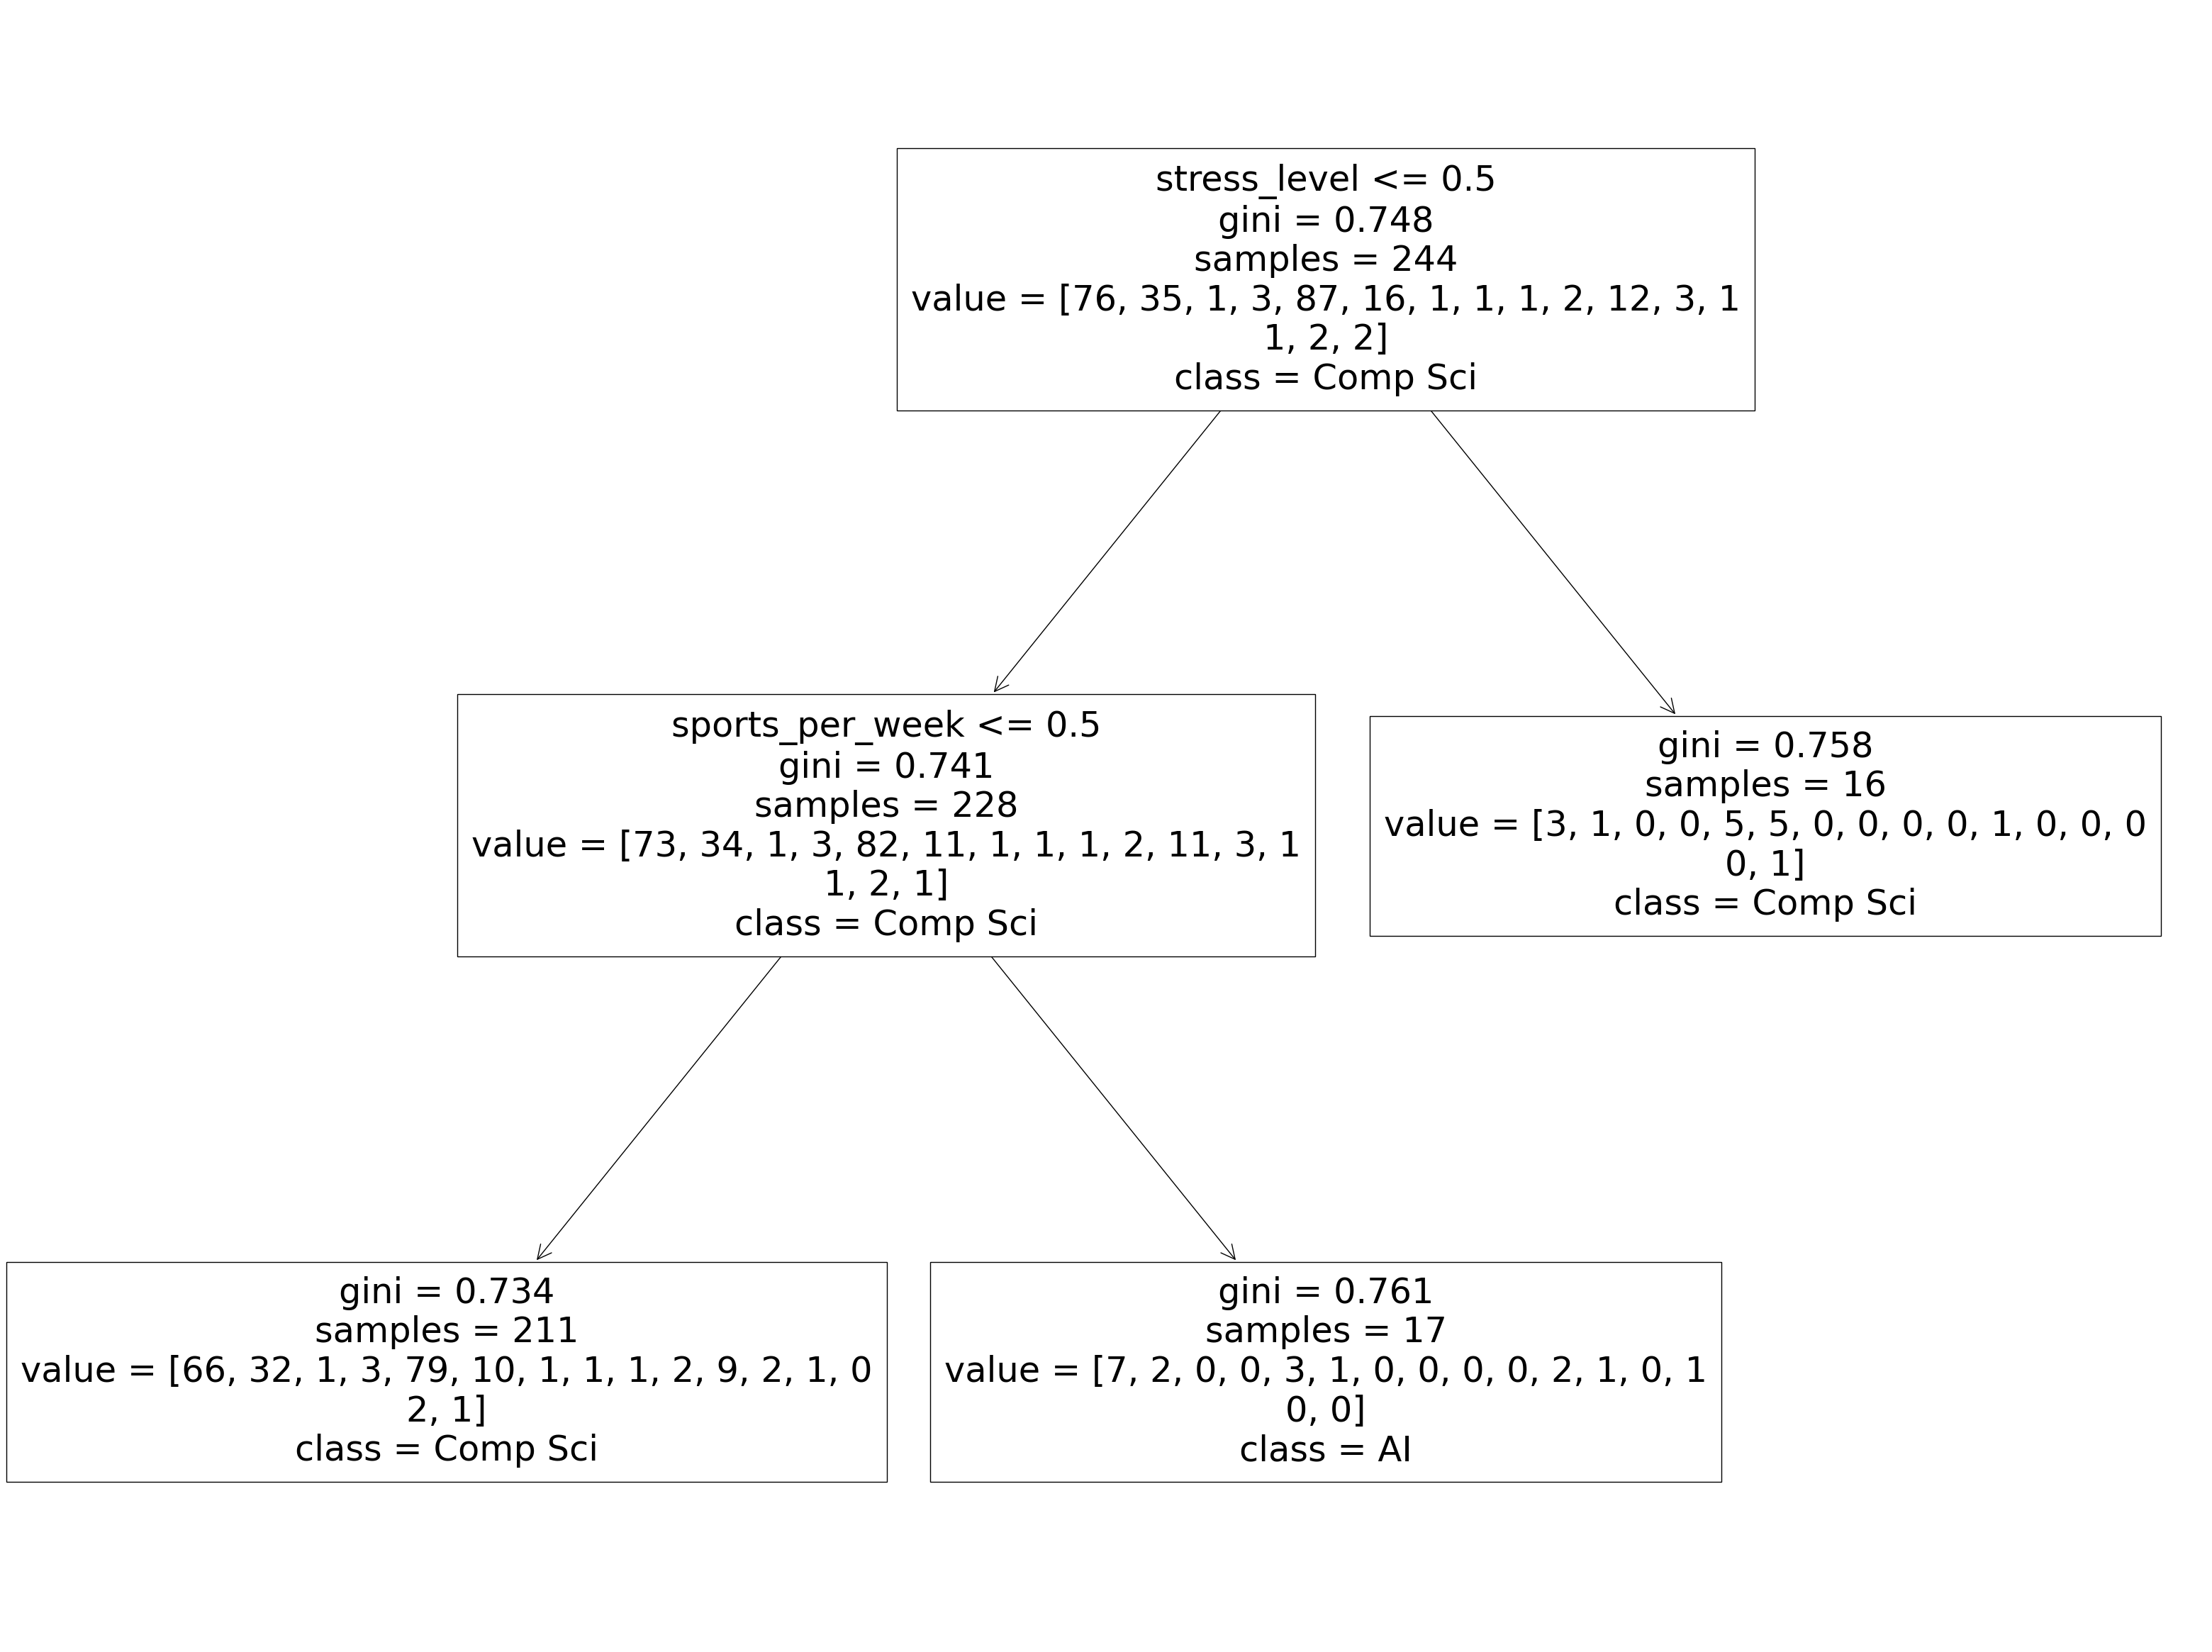

Best hyperparameters: {'select__k': 4, 'tree__criterion': 'gini', 'tree__max_depth': 2, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2, 'tree__splitter': 'best'}
Accuracy score: 0.35654761904761906

Selected Features:
good_day_(1)_1: 0.9999999741960192
good_day_(1)_2: 0.9999998412801192
good_day_(1)_3: 0.997286507462654
good_day_(2)_2: 0.9999999998129384
Test set accuracy: 0.5409836065573771
Test set F1 score: 0.43081152632114855

Confusion Matrix:
[[ 0  0  0  1  0  0  0  0]
 [ 0  4  0 12  0  0  0  0]
 [ 0  2  0  3  0  0  0  0]
 [ 0  1  0 29  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]]


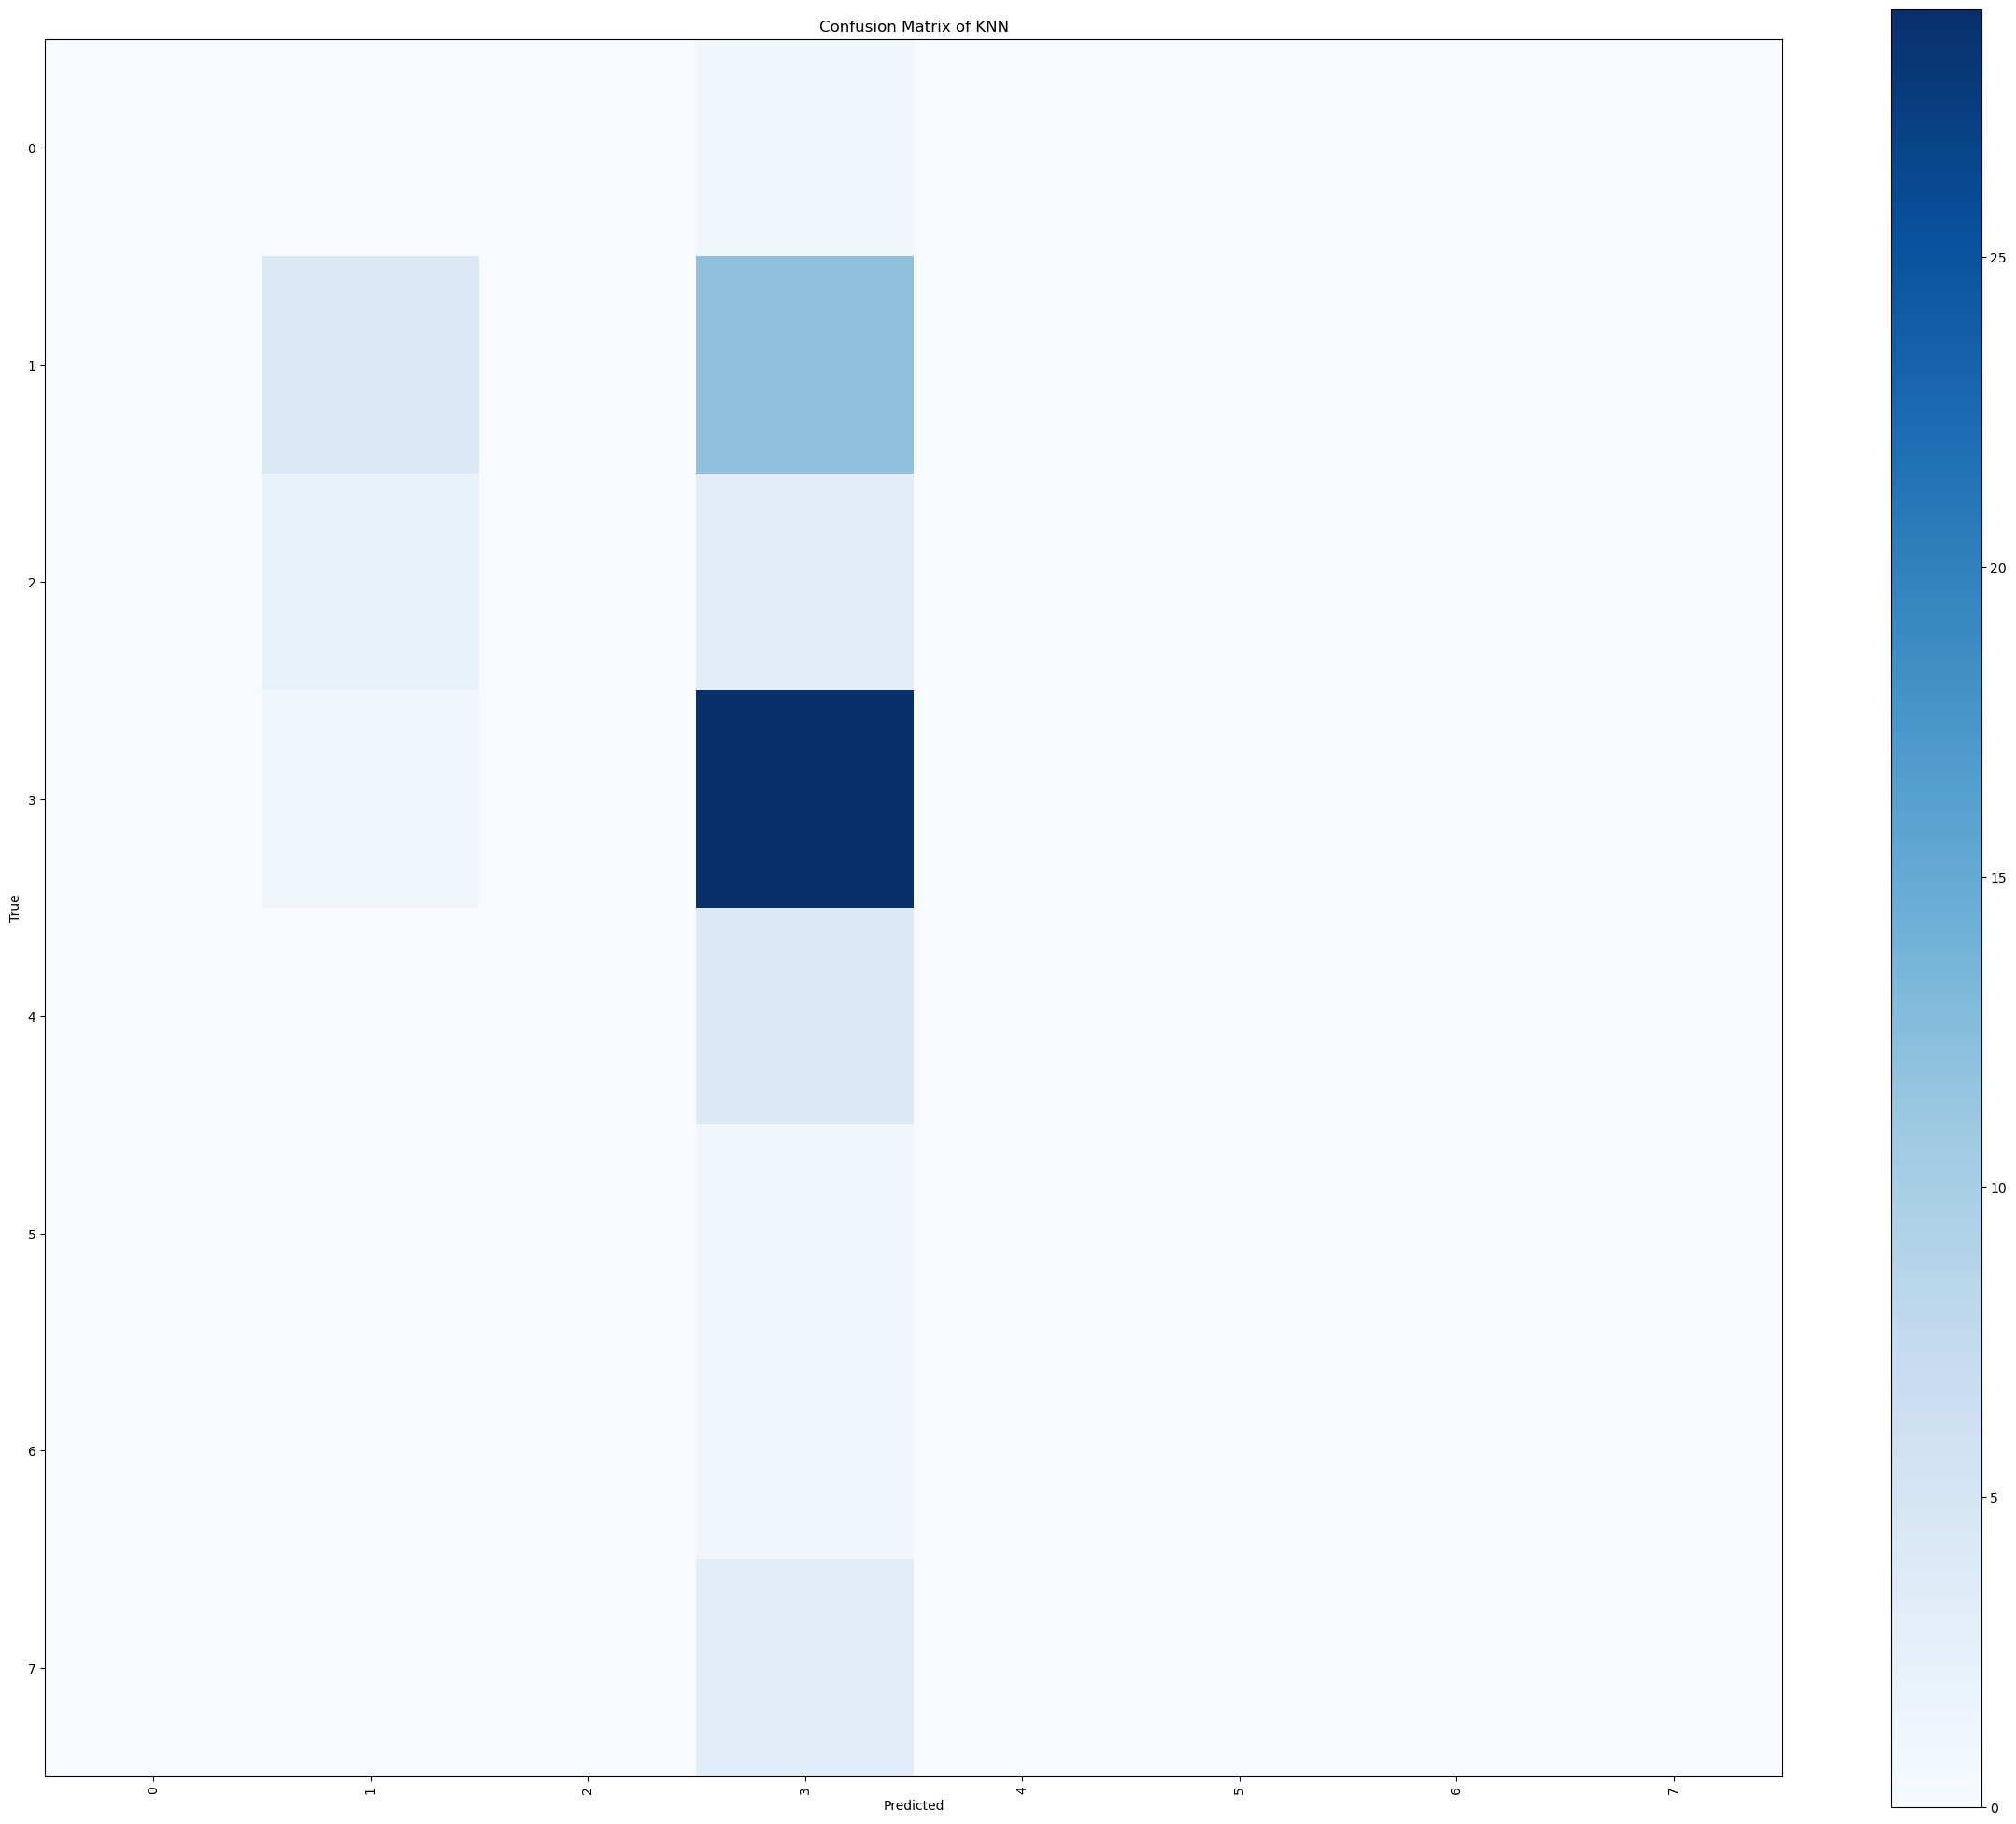


McNemar's Test:
Statistic:  0.0
P-value:  1.0
There is no statistically significant difference between the two models.


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar

# Load the dataset
iris = pd.read_csv('classification_dataset_new.csv')

# Check for missing values
# print(iris.isnull().sum())

# Separate target variable and feature variables
target = iris['programme']
iris = iris.drop(['programme', 'Unnamed: 0'], axis=1)
# print(iris.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__splitter': ['best', 'random'],
    'tree__max_depth': range(1, 10),
    'tree__min_samples_split': range(2, 10),
    'tree__min_samples_leaf': range(1, 5),
    'select__k': [2, 3, 4]  # select the best 2, 3, or 4 features
}

# Create a pipeline to select the best features and train the Decision Tree model
pipeline = Pipeline([
    # ('select', SelectKBest(f_classif)),
    ('select', SelectKBest(score_func=chi2, k=5)),
    ('tree', DecisionTreeClassifier())
])

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best estimator from the GridSearchCV object
best_model = grid_search.best_estimator_

# Plot the decision tree
fig = plt.figure(figsize=(40, 30))
_ = tree.plot_tree(best_model.named_steps['tree'],
                   feature_names=iris.columns,
                   class_names=target.unique())
plt.show()

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Print the selected features and their p-values
selected_features = grid_search.best_estimator_.named_steps['select'].get_support()
p_values = grid_search.best_estimator_.named_steps['select'].pvalues_
feature_names = iris.columns

print("\nSelected Features:")
for i, feature in enumerate(feature_names[selected_features]):
    print(f"{feature}: {p_values[i]}")

# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # calculate the weighted F1 score
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)

# Compute and print the confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot the confusion matrix with x-axis labels rotated vertically
plt.figure(figsize=(30, 25))
plt.title("Confusion Matrix of KNN")
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.yticks(rotation='horizontal') # Keep y-axis labels horizontal
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Perform McNemar's test for statistical significance
# Create contingency table
y_pred_model1 = best_model.predict(X_test)
y_pred_model2 = y_pred # replace with predictions from the other model
contingency_table = pd.crosstab(y_test, y_pred_model1, margins=True)

# Perform McNemar's test
result = mcnemar(contingency_table, exact=True)
print("\nMcNemar's Test:")
print("Statistic: ", result.statistic)
print("P-value: ", result.pvalue)

# Interpret McNemar's test results
alpha = 0.05 # significance level
if result.pvalue < alpha:
    print("There is a statistically significant difference between the two models.")
else:
    print("There is no statistically significant difference between the two models.")

Best hyperparameters: {'knn__algorithm': 'brute', 'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform', 'select__k': 4}
Accuracy score: 0.3647959183673469

Selected Features:
good_day_(1)_1: 0.9999999741960192
good_day_(1)_2: 0.9999998412801192
good_day_(1)_3: 0.997286507462654
good_day_(2)_2: 0.9999999998129384
Test set accuracy: 0.5081967213114754
Test set F1 score: 0.12005163511187607

Confusion Matrix:
[[ 0  0  0  1  0  0  0  0]
 [ 0  3  0 12  1  0  0  0]
 [ 0  1  0  3  1  0  0  0]
 [ 0  1  0 28  1  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]]

Confidence Intervals:
Accuracy: [0.37704918 0.63934426]
F1 score: [0.09317627 0.21494663]


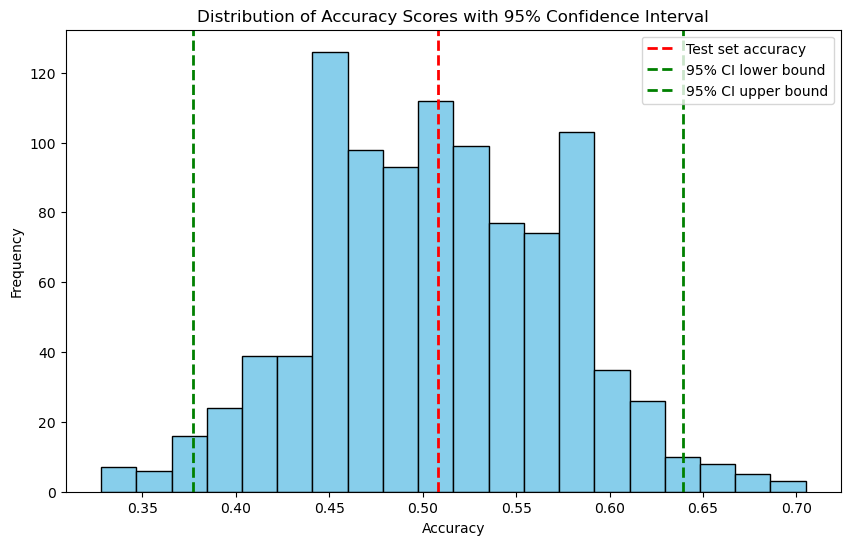

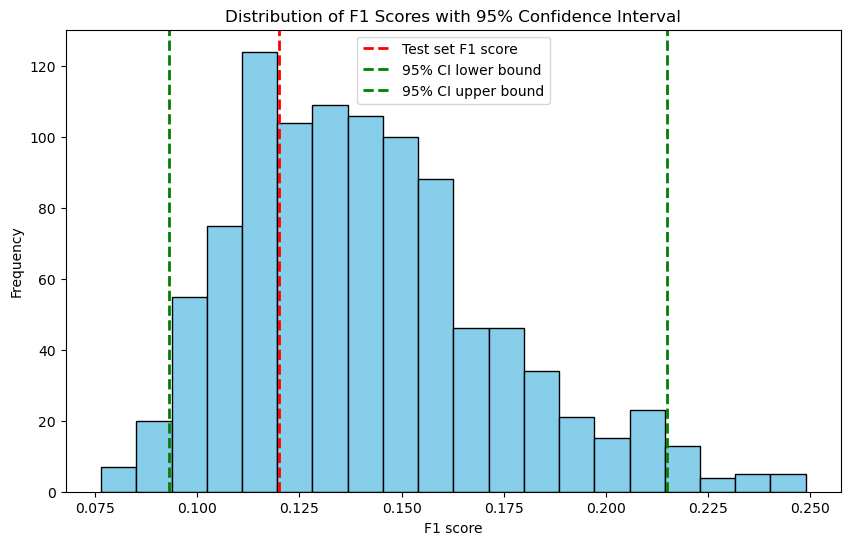

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t


# Load the dataset
data = pd.read_csv('classification_dataset_new.csv')
# print(data)

# Check for missing values
# print(data.isnull().sum())

# Drop missing values
data = data.dropna()

# Separate target variable and feature variables
target = data['programme']
data = data.drop(['programme','Unnamed: 0'],axis = 1)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'knn__n_neighbors': range(1, 31),  # number of neighbors to include in the majority of the voting process
    'knn__weights': ['uniform', 'distance'],  # weight function to use in prediction
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # algorithm to use for nearest neighbors search
    'knn__p': [1, 2],  # power parameter for Minkowski metric
    'select__k': [2, 3, 4]  # select the best 2, 3, or 4 features
}

# Create a pipeline to select the best features and train the KNN model
pipeline = Pipeline([
    ('select', SelectKBest(score_func=chi2, k=5)),
    ('knn', KNeighborsClassifier())
])

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

# Print the selected features and their p-values
selected_features = grid_search.best_estimator_.named_steps['select'].get_support()
p_values = grid_search.best_estimator_.named_steps['select'].pvalues_
feature_names = data.columns

# # Get the best estimator from the GridSearchCV object
# best_model = grid_search.best_estimator_

# # Plot the decision tree
# fig = plt.figure(figsize=(40,30))
# _ = tree.plot_tree(best_model.named_steps['tree'], 
#                    feature_names=data.columns,  
#                    class_names=target.unique())
# plt.show()

print("\nSelected Features:")
for i, feature in enumerate(feature_names[selected_features]):
    print(f"{feature}: {p_values[i]}")

# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print("Test set accuracy:", accuracy)
print("Test set F1 score:", f1)

# Compute and print the confusion matrix as text
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Calculate confidence intervals for accuracy and F1 score

# Accuracy
n_test = len(y_test)
accuracy_scores = []
for _ in range(1000):  # repeat 1000 times to get a distribution of accuracy scores
    indices = np.random.randint(0, len(y_test), n_test)
    y_pred = grid_search.predict(X_test.iloc[indices])
    accuracy_scores.append(accuracy_score(y_test.iloc[indices], y_pred))

accuracy_scores = np.array(accuracy_scores)
confidence_interval_acc = np.percentile(accuracy_scores, q=[2.5, 97.5]) # 95% confidence interval

# F1 score
f1_scores = []
for _ in range(1000): # repeat 1000 times to get a distribution of F1 scores
    indices = np.random.randint(0, len(y_test), n_test)
    y_pred = grid_search.predict(X_test.iloc[indices])
    f1_scores.append(f1_score(y_test.iloc[indices], y_pred, average='macro'))

f1_scores = np.array(f1_scores)
confidence_interval_f1 = np.percentile(f1_scores, q=[2.5, 97.5]) # 95% confidence interval

print("\nConfidence Intervals:")
print("Accuracy:", confidence_interval_acc)
print("F1 score:", confidence_interval_f1)

# Plot the distribution of accuracy scores
plt.figure(figsize=(10, 6))
plt.hist(accuracy_scores, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=accuracy, color='red', linestyle='dashed', linewidth=2, label='Test set accuracy')
plt.axvline(x=confidence_interval_acc[0], color='green', linestyle='dashed', linewidth=2, label='95% CI lower bound')
plt.axvline(x=confidence_interval_acc[1], color='green', linestyle='dashed', linewidth=2, label='95% CI upper bound')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Accuracy Scores with 95% Confidence Interval')
plt.legend()
plt.show()

# Plot the distribution of F1 scores
plt.figure(figsize=(10, 6))
plt.hist(f1_scores, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=f1, color='red', linestyle='dashed', linewidth=2, label='Test set F1 score')
plt.axvline(x=confidence_interval_f1[0], color='green', linestyle='dashed', linewidth=2, label='95% CI lower bound')
plt.axvline(x=confidence_interval_f1[1], color='green', linestyle='dashed', linewidth=2, label='95% CI upper bound')
plt.xlabel('F1 score')
plt.ylabel('Frequency')
plt.title('Distribution of F1 Scores with 95% Confidence Interval')
plt.legend()
plt.show()
